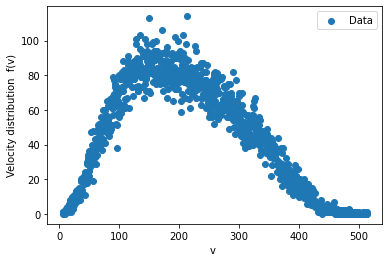

In [54]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import pandas as pd

file_path = 'halo_1_DMO.hdf5'
halo1 = h5py.File(file_path, 'r')
halo1.keys()
data_set = halo1['DarkMatter']
data_set.keys()
vels = np.array(data_set['Velocities'])
particle_codts = np.array(data_set['Coordinates'])


num_dat = len(particle_codts)

r_i = np.sqrt( np.sum(particle_codts**2, axis=1) )
len(r_i)
#print(r_i)

# def find_index(dat):
#     index = np.array([])
#     for i in range(0, len(dat)):
#         r_min = 7  # lower bound of the solar vicinity
#         r_max = 9  # uper bound of the solar vicinity

#         if r_min <= dat[i] and r_max >= dat[i]:
#             index = np.append(index, i)
#         # print(index)
#     return index
def find_index(dat):
    
    index = []
    for i in range(len(dat)):
        r_min = 7 # lower bound of the solar vicinity
        r_max = 9 # uper bound of the solar vicinity
        
        if r_min <= dat[i] and r_max >= dat[i]:
            index.append(i)
    return index
# FOR SOME REASON, PUTTING THE INDEX IN A np.arry 
#convert them in floats, better to use a list
index = find_index(r_i)

num_vic = len(index)
particle_veloc =  np.array([vels[i] for i in index])
# Here need to extract the velocities of only the particles that are in the solar vicinity
v = np.sqrt(np.sum(particle_veloc**2,axis=1)) #vels


#print(v)

dat_v_i = pd.Series(v)
min_v = min(v)
max_v = max(v)
#The velocity axis has to be for the real velocities of the particles
v_grid = np.linspace(min_v,max_v,1000) #np.linspace(0,1000)

count_vel, v_points = np.histogram(v, bins= v_grid) #np.histogram(v, bins = len(v))

new_v = np.array([v_points[i] for i in range(len(v_points)-1)])#np.array([v[i] for i in range(len(v_points) - 1)])


Delta_v = v_grid[1] - v_grid[0]

sum_f = Delta_v*np.sum(v)

f_v =  count_vel / sum_f

plt.scatter(new_v,count_vel,label = "Data")
plt.xlabel('v ')
plt.ylabel('Velocity distribution  f(v)')
plt.legend(loc="upper right")
plt.show()
#plt.savefig("vels.png")